In [126]:
from sklearn.metrics.pairwise import rbf_kernel, euclidean_distances,pairwise_distances, cosine_similarity
import summarizer as smzr
from importlib import reload
import numpy as np 
from IPython.display import Audio
import matplotlib.pyplot as plt

In [127]:
reload(smzr)

<module 'summarizer' from '/home/nicolas/Documents/mva/s2/audio-signal/projet/summarizer.py'>

In [128]:
def generate_pure(f0, duration=2, fs=22050):
    N = int(duration * fs)
    n = np.arange(N)
    return np.cos(2 * np.pi * f0 * n / fs)

In [129]:
a = generate_pure(1000,30)
b = generate_pure(500,40)
c = generate_pure(2000,30)
abc = np.concatenate((a,b,c))

In [130]:
Audio(data=abc,rate=22050)

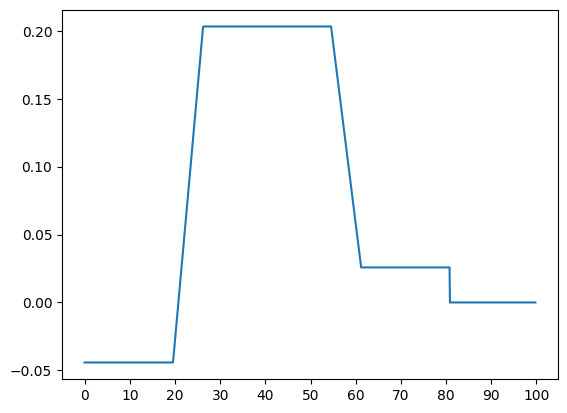

In [131]:
p = smzr.SongSummary(abc)
similarity_params = {'method':'mfcc','similarity':cosine_similarity,'is_similarity':True, 'summary_time':20}
p.compute_similarity(**similarity_params)
p.summarize_cooperfoote()
p.summarize_triple()
p.plot_scores(extend=True)

In [132]:
scores = {}
for L in [20,30,40]:
    similarity_params = {'method':'spectrogram','similarity':cosine_similarity,'is_similarity':True, 'summary_time':L}
    p.compute_similarity(**similarity_params)
    p.summarize_cooperfoote()

    scores.update({L:p.sliding_score})

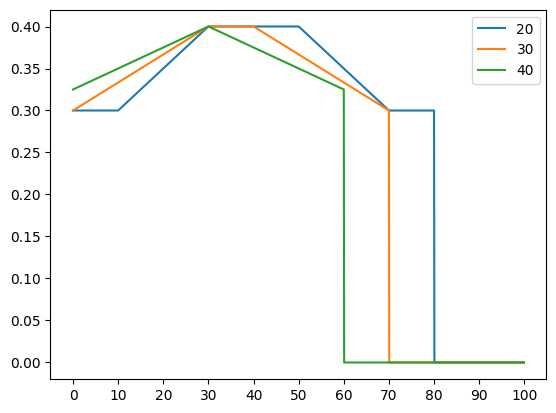

In [133]:
f , ax = plt.subplots()
s20 = np.pad(scores[20],(0,int(p.second_to_window(100)) - len(scores[20])), 'constant', constant_values=(0, 0))
s30 = np.pad(scores[30],(0,int(p.second_to_window(100)) - len(scores[30])), 'constant', constant_values=(0, 0))
s40 = np.pad(scores[40],(0,int(p.second_to_window(100)) - len(scores[40])), 'constant', constant_values=(0, 0))
p1 = ax.plot(s20, label='20')
p2 = ax.plot(s30, label='30')
p3 = ax.plot(s40, label='40')

ax.set_xticks([p.second_to_window(_) for _ in range(0,101,10)],labels=[_ for _ in range(0,101,10)])
plt.legend()
plt.show()

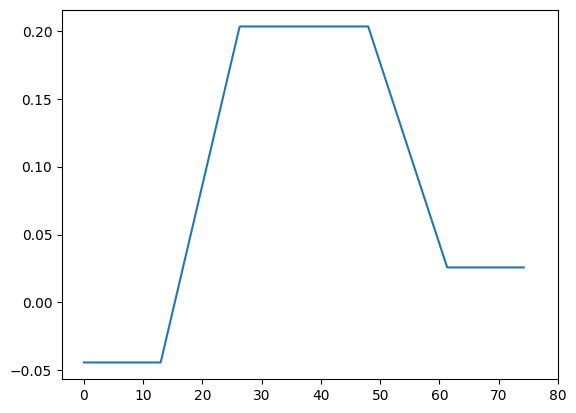

In [30]:
p.plot_scores()

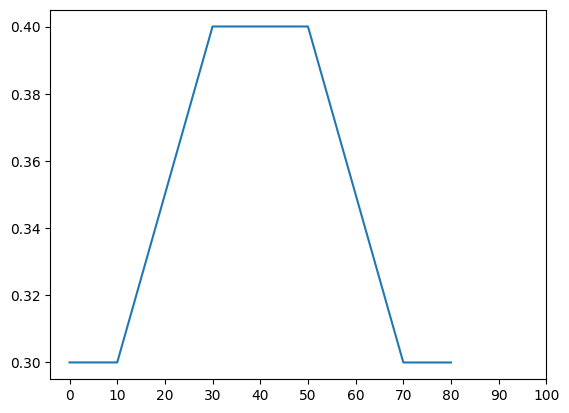

In [54]:

f, ax = plt.subplots()
ax.plot(scores[20])
ax.set_xticks([p.second_to_window(_) for _ in range(0,101,10)],labels=[_ for _ in range(0,101,10)])
plt.show()

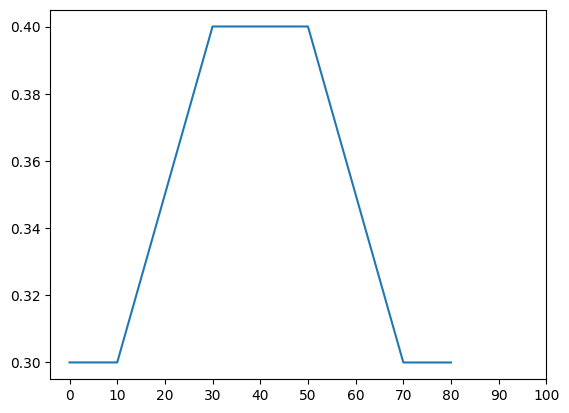

In [17]:

f, ax = plt.subplots()
ax.plot(scores[20])
ax.set_xticks([p.second_to_window(_) for _ in range(0,101,10)],labels=[_ for _ in range(0,101,10)])
plt.show()

In [29]:
p.point_to_second(len(p.song))

100.0

In [25]:
p.window_to_second(p.sim_matrix.shape[0])

87.52761904761904

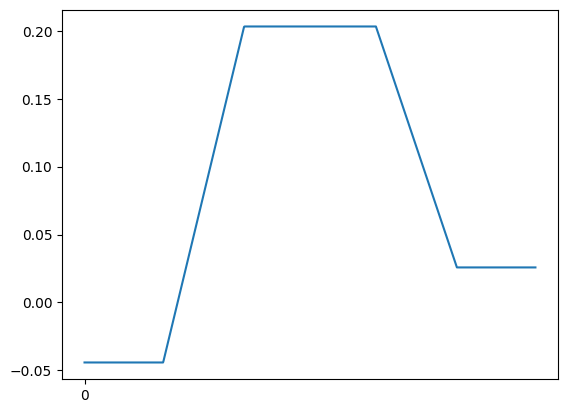

In [53]:
p.plot_scores()

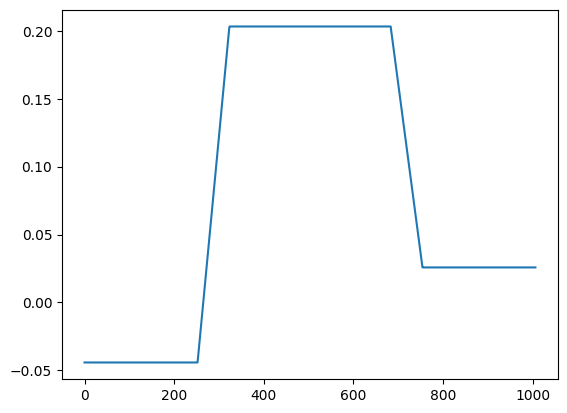

In [98]:
ticks = np.arange(0, 1230, int(10/p.win_step_seconds))
labels = [0]
labels.extend(list(int(p.window_to_second(_)+1) for _ in ticks[1:]))
labels

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

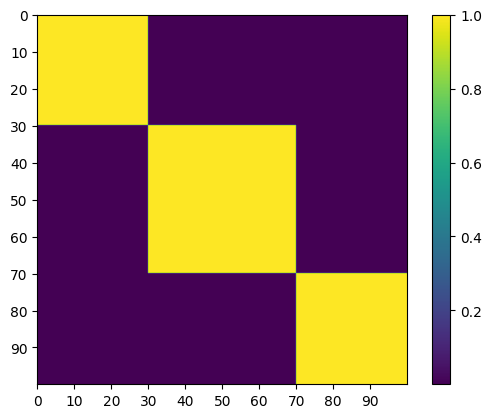

In [106]:
f, ax = plt.subplots()
img = ax.imshow(p.sim_matrix)

ticks = np.arange(0, p.sim_matrix.shape[0], int(10/p.win_step_seconds))
labels = [0]
labels.extend(list(int(p.window_to_second(_)+1) for _ in ticks[1:]))

ax.set_yticks(ticks,labels)
ax.set_xticks(ticks,labels)

plt.colorbar(img)
plt.show()

# l2 inversed

In [197]:
def euclidean_similarity(X):
    Y = euclidean_distances(X)
    return -Y

In [205]:
dissimilarity_params = {'method':'spectrogram','similarity':euclidean_similarity,'is_similarity':True, 'summary_time':20}

In [206]:
q = smzr.SongSummary(abc)
q.compute_similarity(**dissimilarity_params)
q.summarize_cooperfoote()
q.summarize_triple()

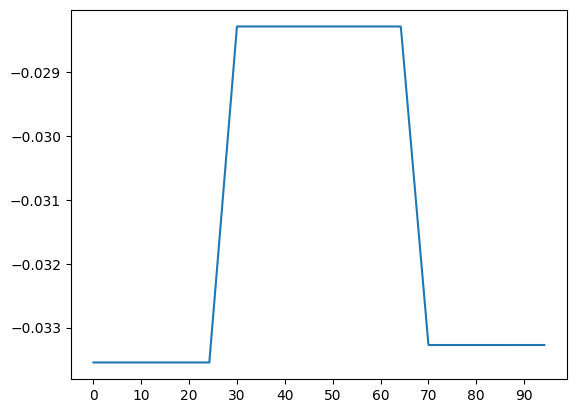

In [207]:
q.plot_scores()

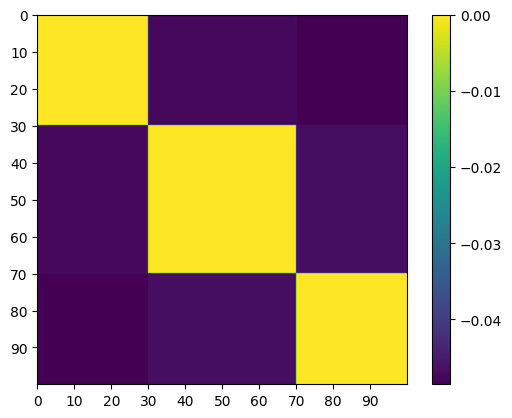

In [208]:
q.plot_matrix()

In [18]:
import matplotlib.pyplot as plt

In [19]:
def moving_average(x, w=None):
    """Computes moving average of window size w on x."""
    return np.convolve(x, np.ones(w), 'valid') / w

In [20]:
def moving_average_gpt(arr, window_size):
    cumsum = np.cumsum(arr, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

# Example usage:


In [46]:
S = np.mean(q.sim_matrix,axis=1)

In [25]:
 # el step size debería ser la longitud del summary expresado
# en unidades de ventana
# entiendo que eso ya está pasando, así que habría que ver qué onda
k = moving_average_gpt(S,q.summary_size)

In [39]:
l[365:372]

array([0.39921783, 0.39942198, 0.39962613, 0.39983027, 0.40003442,
       0.40003384, 0.40003384])

In [40]:
q.summary_size

430

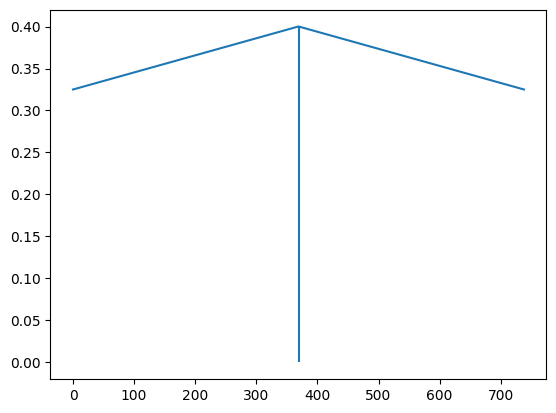